In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset
df = pd.read_csv('SampleSuperstore.csv', encoding='ISO-8859-1')  # Make sure the file is in the working directory

# Basic dataset info
print("🔍 First 5 rows of the dataset:")
print(df.head())

print("\n📊 Dataset Info:")
print(df.info())

print("\n📉 Missing Values:")
print(df.isnull().sum())

🔍 First 5 rows of the dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-C

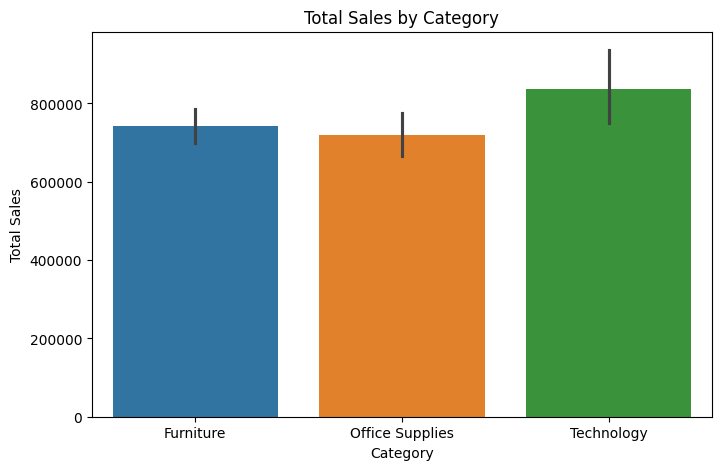

In [13]:
# Total sales by category
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, hue='Category')
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.show()


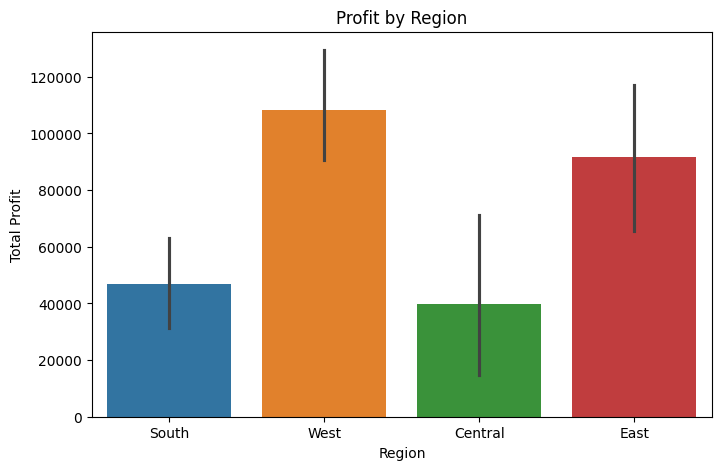

In [11]:
# Profit by Region
plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='Profit', data=df, estimator=sum, hue='Region')
plt.title('Profit by Region')
plt.ylabel('Total Profit')
plt.xlabel('Region')
plt.show()

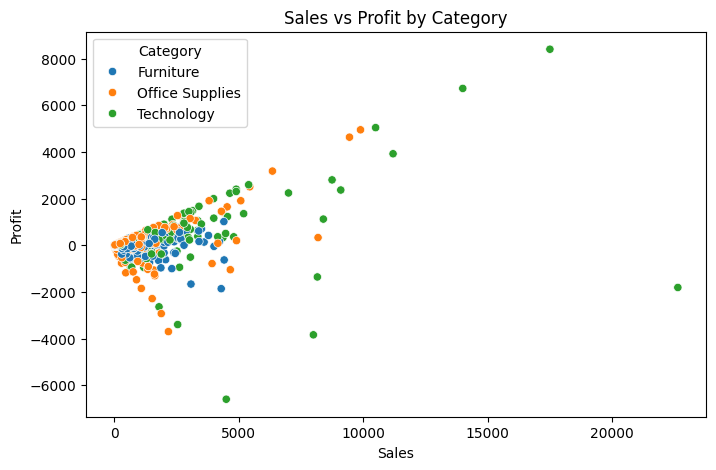

In [14]:
# Sales vs Profit Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Sales', y='Profit', hue='Category', data=df)
plt.title('Sales vs Profit by Category')
plt.show()

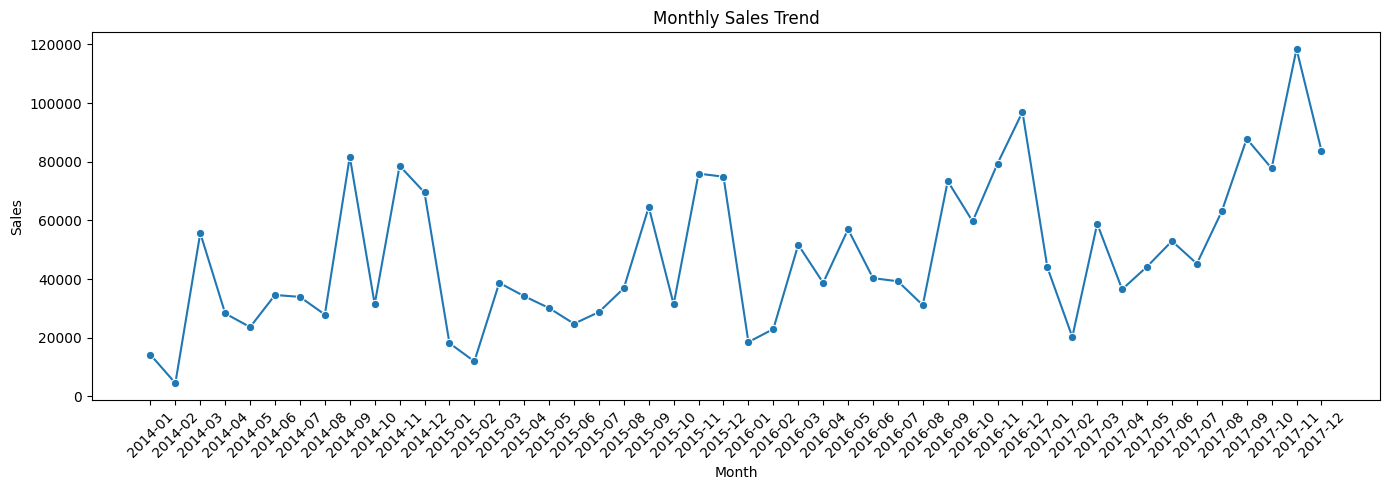

In [16]:
# Orders over Time
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(14, 5))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()